
# Segmenting and Clustering Neighborhoods in Toronto - Notebook 3

# ----------------------------------------------------------------------------------------------------

##  

In [1]:
!pip install requests
print("Done.")

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Done.


In [2]:
!pip install bs4
print("Done.")

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Done.


We will parse the url using BeautifulSoup

In [9]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

In [10]:
# Parse url using BeatifulSoup
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"34174572-9aae-43c5-ae33-f2988dda840e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":1019189119,"wgRevisionId":1019189119,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia semi-protected pag

In [11]:
# Find all tables
tables=soup.find_all('table')
print(len(tables))

3


In [12]:
# Since there are only 3 tables, I will scan until I find the table that I am looking for
tables[0]

<table cellpadding="2" cellspacing="0" rules="all" style="width:100%; border-collapse:collapse; border:1px solid #ccc;">

<tbody><tr>
<td style="width:11%; vertical-align:top; color:#ccc;">
<p><b>M1A</b><br/><span style="font-size:85%;"><i>Not assigned</i></span>
</p>
</td>
<td style="width:11%; vertical-align:top; color:#ccc;">
<p><b>M2A</b><br/><span style="font-size:85%;"><i>Not assigned</i></span>
</p>
</td>
<td style="width:11%; vertical-align:top;">
<p><b>M3A</b><br/><span style="font-size:85%;"><a href="/wiki/North_York" title="North York">North York</a><br/>(<a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>)</span>
</p>
</td>
<td style="width:11%; vertical-align:top;">
<p><b>M4A</b><br/><span style="font-size:85%;"><a href="/wiki/North_York" title="North York">North York</a><br/>(<a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>)</span>
</p>
</td>
<td style="width:11%; vertical-align:top;">
<p><b>M5A</b><br/><span style="font-size:85%;"><a h

We find that the table we are looking for is the one at index 0.<br>
Next, we will initialize and populate the dataframe

In [13]:
# Initialize the dataframe
df=pd.DataFrame(columns=['PostalCode','Borough','Neighborhood'])
df

,PostalCode,Borough,Neighborhood


In [14]:
# Populate the dataframe
# We scroll for each "td" so we look at each value
for val in tables[0].tbody.find_all("td"):
    # Store the text into a string
    mystr=val.text
    # The postal code is made of the first 3 characters
    postalcode=mystr[1:4]
    # Then, we remove the first 3 characters and split into a list with separator "("
    # We set the borough as the 1st element of the list and initialize the neighborhoos as the same name as the borough
    mystr=mystr[4:].split("(")
    borough=mystr[0]
    neighborhood=borough
    # If borough is not assigned, we do nothing;
    # If it is assigned, then we populate a new line of the dataframe
    # If a neighborhood is assigned (ie: if the list has more than 1 element, that does not contain "Not assigned"),
    # we set the neighborhood as the string of characters before symbol ")"
    if "Not assigned" not in borough:
        if len(mystr)>1 and "Not assigned" not in mystr[1]:
                neighborhood=mystr[1].split(")")[0].replace("/",",").replace(" ,",",")
        #print(postalcode,borough,neighborhood)
        df=df.append({'PostalCode':postalcode,'Borough':borough,'Neighborhood':neighborhood},ignore_index=True)

In [15]:
df.head(20)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


 <br> __Get the geographical coordinates__

In [3]:
!pip install geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [48]:
import geocoder # import geocoder

I tried the following code as a test, with no success. So I will have to use the .csv file.

In [12]:
postal_code='M1X'

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
i=0
while(lat_lng_coords is None and i<10):
    i=i+1
    g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
    print(g)
    #lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>


It did not work. So we read the .csv file and merge with our neighborhood dataframe

In [16]:
# Read .csv file
latlong=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
latlong.rename(columns={'Postal Code':'PostalCode'},inplace=True)
latlong.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
# merge
dfm=df.join(latlong.set_index('PostalCode'),on='PostalCode')
dfm.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


# Analysis of the neighborhoods

We proceed in four parts: <br>
1. First look at the neaighborhood map <br>
2. Get the data from Foursquare <br>
3. Determine the top 5 types of venues in each neighborhood <br>
4. Cluster the neighborhoods

### __1. First look at the neaighborhood map__

In [49]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Done.')

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2155
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2155
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37ha70c682_1
done

# All requested packages already installed.

Done.


In [17]:
# Using latitude-longitude of Doowntown Torronto
latitude=43.654260
longitude=-79.360636
map_torronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(dfm['Latitude'], dfm['Longitude'], dfm['Borough'], dfm['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torronto)

In [18]:
map_torronto

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

Github does not display folium maps so I am including a .PNG version.

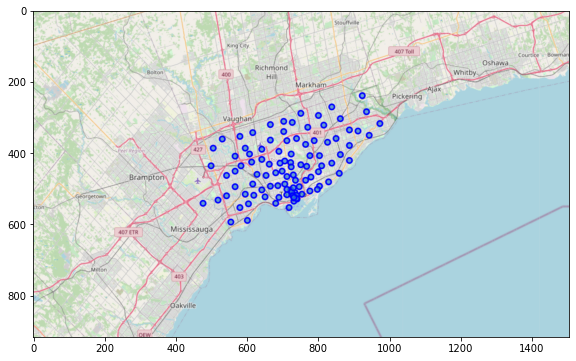

In [24]:
plt.figure(figsize = (10,6))
im0 = img.imread('Capture0.PNG')
plt.imshow(im0)

### __2. Get the data from Foursquare__

Prepare for Foursquare calls

In [6]:
CLIENT_ID =     'XXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXX'
VERSION =       'XXXXXXXXXXXXXXXXXX'

Define a function that returns the venues in the vicinniti of a given neighborhood

In [19]:
def getvenues(lat,long,neighborhood,radius,limit):
    # Define url
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius,
            limit)
    
    # Get request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # Create list of venues
    venues_list=([[neighborhood,v['venue']['name'],v['venue']['categories'][0]['name']] for v in results])
        
    #print(venues_list)
    return(venues_list)

Test the function

In [21]:
radius=500
limit=20
mylat=43.654260
mylon=-79.360636
mynei='Regent Park, Harbourfront'
print(getvenues(mylat,mylon,mynei,radius,limit))

[['Regent Park, Harbourfront', 'Roselle Desserts', 'Bakery'], ['Regent Park, Harbourfront', 'Tandem Coffee', 'Coffee Shop'], ['Regent Park, Harbourfront', 'Cooper Koo Family YMCA', 'Distribution Center'], ['Regent Park, Harbourfront', 'Body Blitz Spa East', 'Spa'], ['Regent Park, Harbourfront', 'Impact Kitchen', 'Restaurant'], ['Regent Park, Harbourfront', 'Corktown Common', 'Park'], ['Regent Park, Harbourfront', 'Morning Glory Cafe', 'Breakfast Spot'], ['Regent Park, Harbourfront', 'The Extension Room', 'Gym / Fitness Center'], ['Regent Park, Harbourfront', 'The Distillery Historic District', 'Historic Site'], ['Regent Park, Harbourfront', 'Distillery Sunday Market', 'Farmers Market'], ['Regent Park, Harbourfront', 'SOMA chocolatemaker', 'Chocolate Shop'], ['Regent Park, Harbourfront', 'Figs Breakfast & Lunch', 'Breakfast Spot'], ['Regent Park, Harbourfront', 'Rooster Coffee', 'Coffee Shop'], ['Regent Park, Harbourfront', 'Arvo', 'Coffee Shop'], ['Regent Park, Harbourfront', 'Starbuck

It works. Let us repeat that for all the neighborhood and store the result into a dataframe.

In [20]:
venues=pd.DataFrame(columns=['Neighborhood','Venue name','Venue type'])
venues

,Neighborhood,Venue name,Venue type


In [22]:
radius=500
limit=50

for i in dfm.index:
    mynei=dfm.loc[i,'Neighborhood']
    mylat=dfm.loc[i,'Latitude']
    mylon=dfm.loc[i,'Longitude']
    print(mynei)
    myvenues=getvenues(mylat,mylon,mynei,radius,limit)
    dftemp = pd.DataFrame(myvenues, columns = venues.columns)
    venues=venues.append(dftemp,ignore_index=True)
    print('Done')
    print(' ')
    
print('All neighborhhods parsed')

Parkwoods
Done
 
Victoria Village
Done
 
Regent Park, Harbourfront
Done
 
Lawrence Manor, Lawrence Heights
Done
 
Ontario Provincial Government
Done
 
Islington Avenue
Done
 
Malvern, Rouge
Done
 
Don Mills
Done
 
Parkview Hill, Woodbine Gardens
Done
 
Garden District, Ryerson
Done
 
Glencairn
Done
 
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Done
 
Rouge Hill, Port Union, Highland Creek
Done
 
Don Mills
Done
 
Woodbine Heights
Done
 
St. James Town
Done
 
Humewood-Cedarvale
Done
 
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Done
 
Guildwood, Morningside, West Hill
Done
 
The Beaches
Done
 
Berczy Park
Done
 
Caledonia-Fairbanks
Done
 
Woburn
Done
 
Leaside
Done
 
Central Bay Street
Done
 
Christie
Done
 
Cedarbrae
Done
 
Hillcrest Village
Done
 
Bathurst Manor, Wilson Heights, Downsview North
Done
 
Thorncliffe Park
Done
 
Richmond, Adelaide, King
Done
 
Dufferin, Dovercourt Village
Done
 
Scarborough Village
Done
 
Fairview, Henry Farm, O

In [24]:
venues.head(20)

,Neighborhood,Venue name,Venue type
0,Parkwoods,Brookbanks Park,Park
1,Parkwoods,TTC stop #8380,Bus Stop
2,Parkwoods,Variety Store,Food & Drink Shop
3,Victoria Village,Victoria Village Arena,Hockey Arena
4,Victoria Village,Portugril,Portuguese Restaurant
5,Victoria Village,Tim Hortons,Coffee Shop
6,Victoria Village,Eglinton Ave E & Sloane Ave/Bermondsey Rd,Intersection
7,Victoria Village,Pizza Nova,Pizza Place
8,"Regent Park, Harbourfront",Roselle Desserts,Bakery
9,"Regent Park, Harbourfront",Tandem Coffee,Coffee Shop


In [25]:
venues.shape

(1669, 3)

### __3. Determine the top 5 types of venues in each neighborhood__

To do this, we apply the one hot encoding to the venues dataset and compute the mean value for each neighborhood, for each venues type. That gives us the proportion of each venue type in each neighborhood. Then, we sort and pick the 5 venues type with highest proportion.

In [26]:
# one hot encoding
venues_onehot= pd.get_dummies(venues[['Venue type']], prefix="", prefix_sep="")
venues_onehot[venues.columns]=venues[venues.columns]
list_columns=list(venues_onehot.columns)
list_columns.insert(0, list_columns.pop(list_columns.index('Neighborhood')))
list_columns.insert(1, list_columns.pop(list_columns.index('Venue name')))
list_columns.insert(1, list_columns.pop(list_columns.index('Venue type')))
venues_onehot=venues_onehot[list_columns]
venues_onehot.head(10)

,Neighborhood,Venue type,Venue name,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,Park,Brookbanks Park,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,Bus Stop,TTC stop #8380,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,Food & Drink Shop,Variety Store,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,Hockey Arena,Victoria Village Arena,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,Portuguese Restaurant,Portugril,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Victoria Village,Coffee Shop,Tim Hortons,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Victoria Village,Intersection,Eglinton Ave E & Sloane Ave/Bermondsey Rd,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Victoria Village,Pizza Place,Pizza Nova,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"Regent Park, Harbourfront",Bakery,Roselle Desserts,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"Regent Park, Harbourfront",Coffee Shop,Tandem Coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is just an add-on. We count the venue types for each neighborhood.

In [27]:
vcount=venues_onehot.groupby('Neighborhood').count().reset_index()
vcount.head(10)

,Neighborhood,Venue type,Venue name,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,"Alderwood, Long Branch",7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2,"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
3,Bayview Village,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,"Bedford Park, Lawrence Manor East",27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
5,Berczy Park,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
6,"Birch Cliff, Cliffside West",4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
8,"CN Tower, King and Spadina, Railway Lands, Har...",15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
9,Caledonia-Fairbanks,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Now we compute the proportion of each venue type, for each neighborhood.

In [28]:
vmean=venues_onehot.groupby('Neighborhood').mean().reset_index()
vmean.head(10)

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,Bayview Village,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.037037,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
5,Berczy Park,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
6,"Birch Cliff, Cliffside West",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
7,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
8,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.0,0.066667,0.066667,0.133333,0.2,0.066667,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
9,Caledonia-Fairbanks,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0


By sorting each line in the previous table, we determine the 5 types of venues with the highest propertion.

In [31]:
numax=5
colist=['Neighborhood']
for i in range(numax):
    colist.append("C"+str(i+1))
#colist

venues_sorted=pd.DataFrame(columns=colist)

nmax=numax+1
for i in vmean.index:
    myrow=vmean.iloc[i,1:].sort_values(ascending=False)
    #print(myrow.index.values)
    myrow2=[vmean.iloc[i,0]]+list(myrow.index.values)
    #print (myrow2[0:6])
    #dftemp=pd.DataFrame
    venues_sorted.loc[i,:]=myrow2[0:6]
venues_sorted.head(10)

,Neighborhood,C1,C2,C3,C4,C5
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Skating Rink,Molecular Gastronomy Restaurant
1,"Alderwood, Long Branch",Pizza Place,Skating Rink,Sandwich Place,Pub,Coffee Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Pharmacy,Sushi Restaurant,Fried Chicken Joint
3,Bayview Village,Japanese Restaurant,Bank,Chinese Restaurant,Café,Accessories Store
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Hobby Shop,Sandwich Place,Breakfast Spot
5,Berczy Park,Coffee Shop,Beer Bar,Cheese Shop,Seafood Restaurant,Cocktail Bar
6,"Birch Cliff, Cliffside West",College Stadium,Skating Rink,General Entertainment,Café,Medical Center
7,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Grocery Store,Intersection
8,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Harbor / Marina,Bar,Rental Car Location
9,Caledonia-Fairbanks,Park,Women's Store,Pool,Accessories Store,Men's Store


### __4. Cluster the neighborhoods__

In [1]:
#!pip uninstall numpy --yes
!pip install numpy==1.18
!pip install scipy==1.1.0
!pip install scikit-learn==0.23.1
import numpy as np
#!pip install statsmodels --upgrade
from sklearn.cluster import KMeans

distutils: /opt/conda/envs/Python-3.7-main/include/python3.7m/UNKNOWN
sysconfig: /opt/conda/envs/Python-3.7-main/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/envs/Python-3.7-main/include/python3.7m/UNKNOWN
sysconfig: /opt/conda/envs/Python-3.7-main/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/envs/Python-3.7-main/include/python3.7m/UNKNOWN
sysconfig: /opt/conda/envs/Python-3.7-main/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/envs/Python-3.7-main/include/python3.7m/UNKNOWN
sysconfig: /opt/conda/envs/Python-3.7-main/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/envs/Python-3.7-main/include/python3.7m/UNKNOWN
sysconfig: /opt/conda/envs/Python-3.7-main/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/envs/Python-3.7-main/include/python3.7m/UNKNOWN
sysconfig: /opt

Initialize the k-means algorithm with 5 clusters.

In [2]:
nclusters=5
mykmean=KMeans(n_clusters=nclusters, random_state=0)

Run the algorithm.

In [41]:
venues_train=vmean.drop('Neighborhood',axis=1)
venues_train.head()
mykmean.fit(venues_train)
mykmean.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

Create a table with all neighborhoods and their label

In [58]:
neighborhoods_labelled=pd.DataFrame(columns=['Neighborhood','Label'])
neighborhoods_labelled['Neighborhood']=vmean['Neighborhood']
neighborhoods_labelled['Label']=mykmean.labels_
neighborhoods_labelled.head(20)

,Neighborhood,Label
0,Agincourt,0
1,"Alderwood, Long Branch",0
2,"Bathurst Manor, Wilson Heights, Downsview North",0
3,Bayview Village,0
4,"Bedford Park, Lawrence Manor East",0
5,Berczy Park,0
6,"Birch Cliff, Cliffside West",0
7,"Brockton, Parkdale Village, Exhibition Place",0
8,"CN Tower, King and Spadina, Railway Lands, Har...",0
9,Caledonia-Fairbanks,1


Finally, create a table with all neighborhoods, their label and geographical positions.

In [59]:
finaldf=neighborhoods_labelled.join(dfm.set_index('Neighborhood'), on='Neighborhood')
finaldf.head(20)

,Neighborhood,Label,PostalCode,Borough,Latitude,Longitude
0,Agincourt,0,M1S,Scarborough,43.794200,-79.262029
1,"Alderwood, Long Branch",0,M8W,Etobicoke,43.602414,-79.543484
2,"Bathurst Manor, Wilson Heights, Downsview North",0,M3H,North York,43.754328,-79.442259
3,Bayview Village,0,M2K,North York,43.786947,-79.385975
4,"Bedford Park, Lawrence Manor East",0,M5M,North York,43.733283,-79.419750
5,Berczy Park,0,M5E,Downtown Toronto,43.644771,-79.373306
6,"Birch Cliff, Cliffside West",0,M1N,Scarborough,43.692657,-79.264848
7,"Brockton, Parkdale Village, Exhibition Place",0,M6K,West Toronto,43.636847,-79.428191
8,"CN Tower, King and Spadina, Railway Lands, Har...",0,M5V,Downtown Toronto,43.628947,-79.394420
9,Caledonia-Fairbanks,1,M6E,York,43.689026,-79.453512


<br>
Plot colored markers on the map.<br>
Note that the majority of the neighborhoods have the value 0. If I were to re-do this exercise, I will try running the k-means with several initial values, or use 3 clusters only.

In [6]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [61]:
# create map
latitude=43.654260
longitude=-79.360636
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i + x + (i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(finaldf['Latitude'], finaldf['Longitude'], finaldf['Neighborhood'], finaldf['Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Github does not display folium maps so I am including a .PNG version.

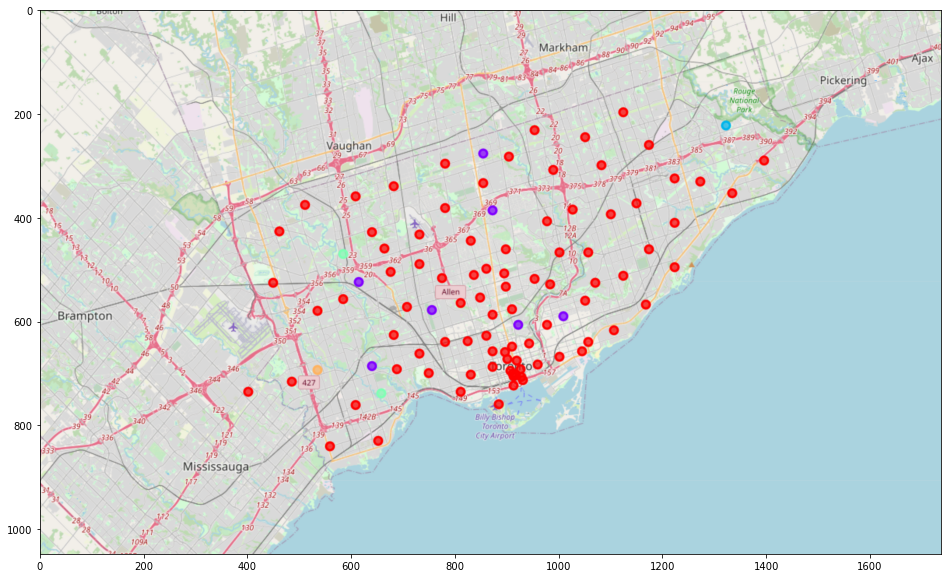

In [22]:
plt.figure(figsize = (20,10))
im = img.imread('Capture.PNG')
plt.imshow(im)